### Fake News Detection

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [9]:
df = pd.read_csv('/Users/simarmalhan/Downloads/fake_news_dataset.csv')
df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


#### Data Preprocessing

In [22]:
df.columns

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label'],
      dtype='object')

In [13]:
df.describe()

,id,sentiment_score,word_count,char_count,has_images,has_videos,readability_score,num_shares,num_comments,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score
count,4000.000000,4000.000000,4000.000000,4000.0000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,2000.500000,-0.000645,795.655750,4277.0680,0.49650,0.484500,54.764595,25144.596750,489.870250,0.497000,49.960750,5.54925,0.494447,50.598110
std,1154.844867,0.574768,406.373871,2186.2073,0.50005,0.499822,14.404027,14387.537467,287.435733,0.500054,29.467911,2.87422,0.289138,28.932298
min,1.000000,-1.000000,100.000000,500.0000,0.00000,0.000000,30.020000,39.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.040000
25%,1000.750000,-0.490000,445.750000,2358.7500,0.00000,0.000000,42.480000,12781.750000,238.000000,0.000000,24.000000,3.00000,0.240000,25.915000
50%,2000.500000,-0.010000,793.000000,4287.0000,0.00000,0.000000,54.235000,25308.500000,483.000000,0.000000,50.000000,6.00000,0.490000,51.480000
75%,3000.250000,0.510000,1150.000000,6206.5000,1.00000,1.000000,67.215000,37453.500000,741.000000,1.000000,76.000000,8.00000,0.740000,75.580000
max,4000.000000,1.000000,1500.000000,7996.0000,1.00000,1.000000,79.980000,50000.000000,1000.000000,1.000000,100.000000,10.00000,1.000000,99.950000


In [18]:
df.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

In [24]:
df.columns

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label'],
      dtype='object')

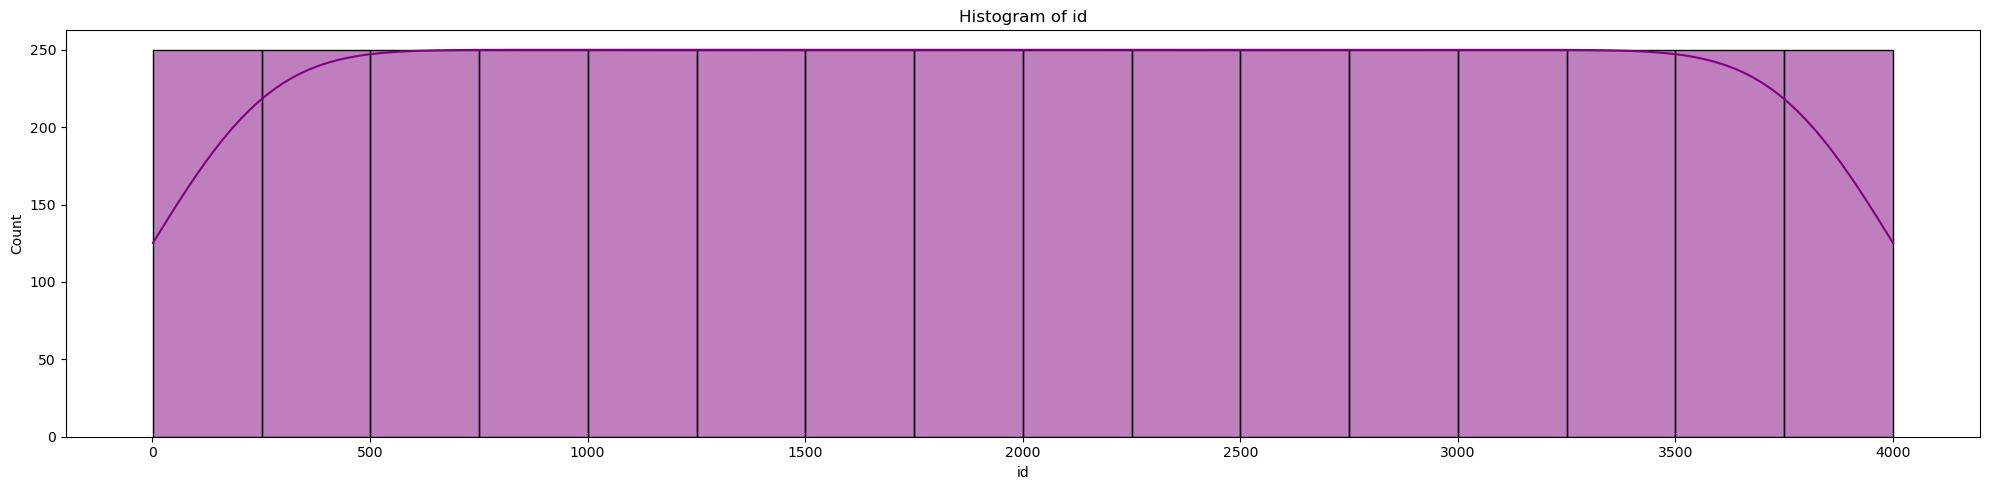

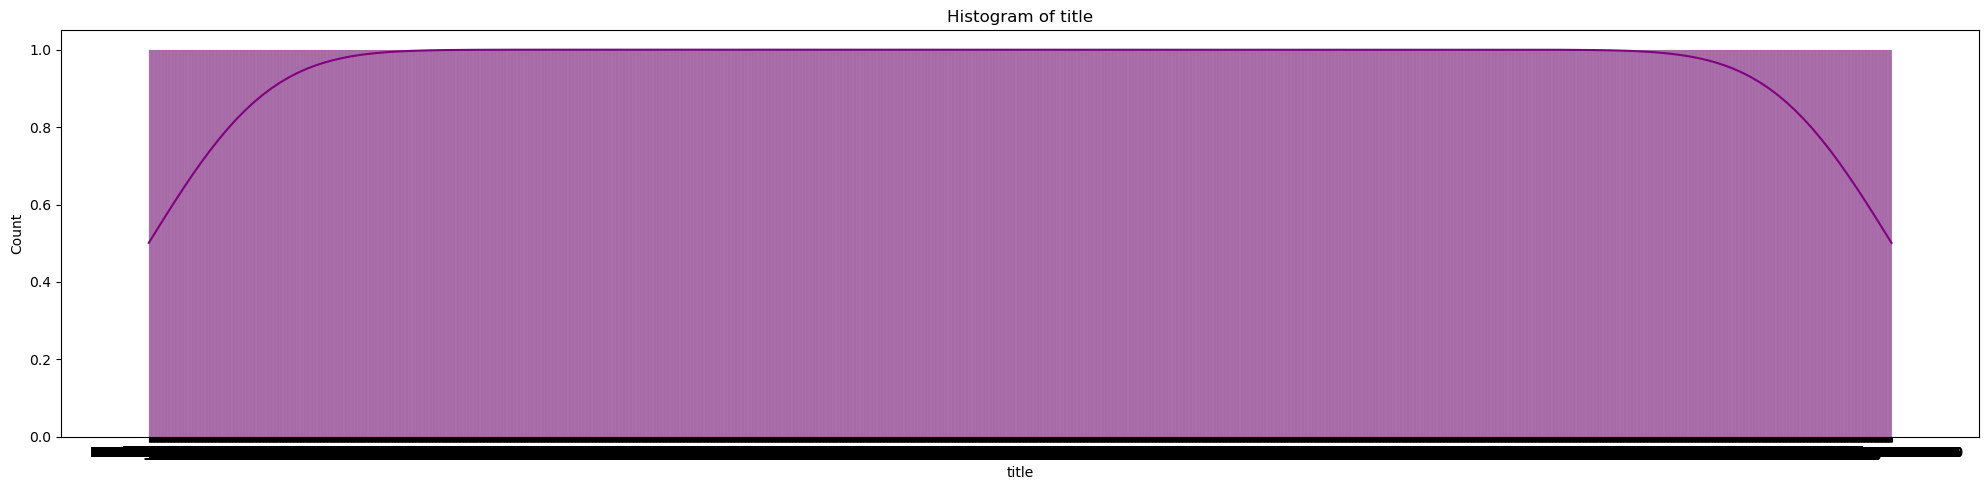

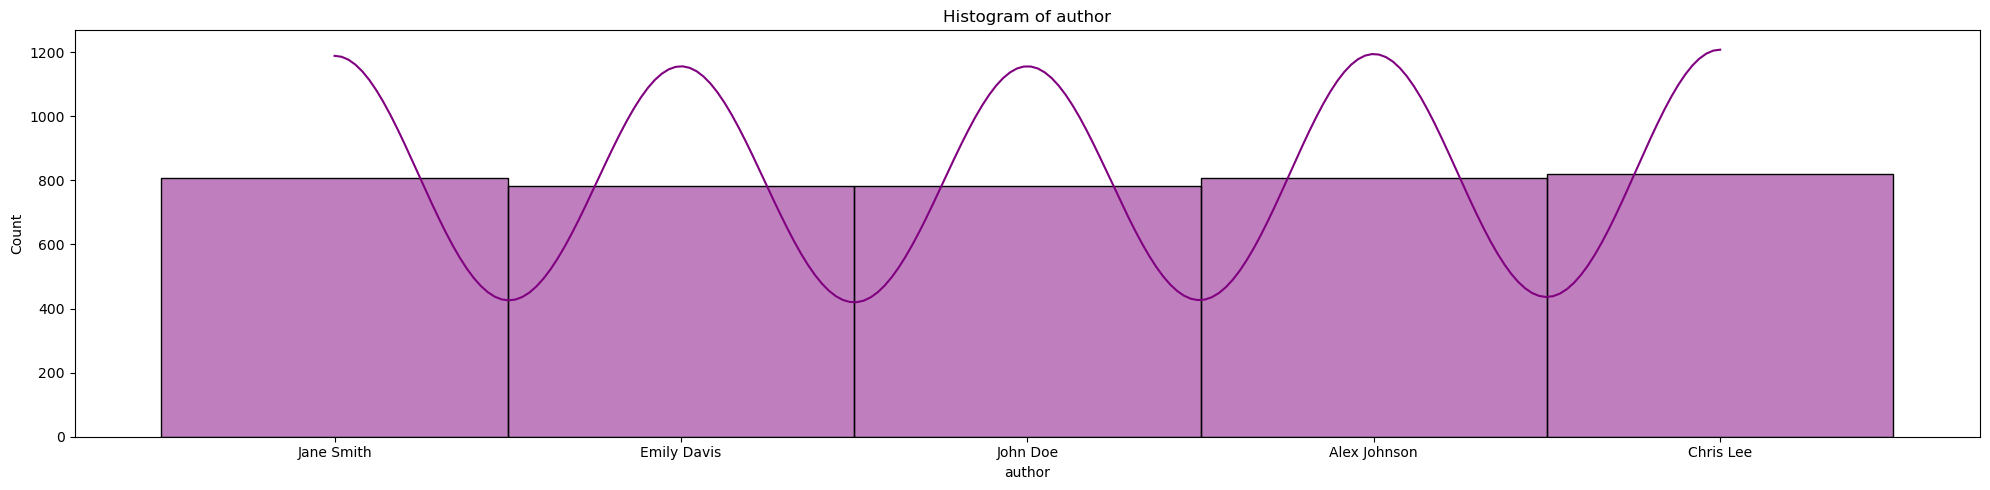

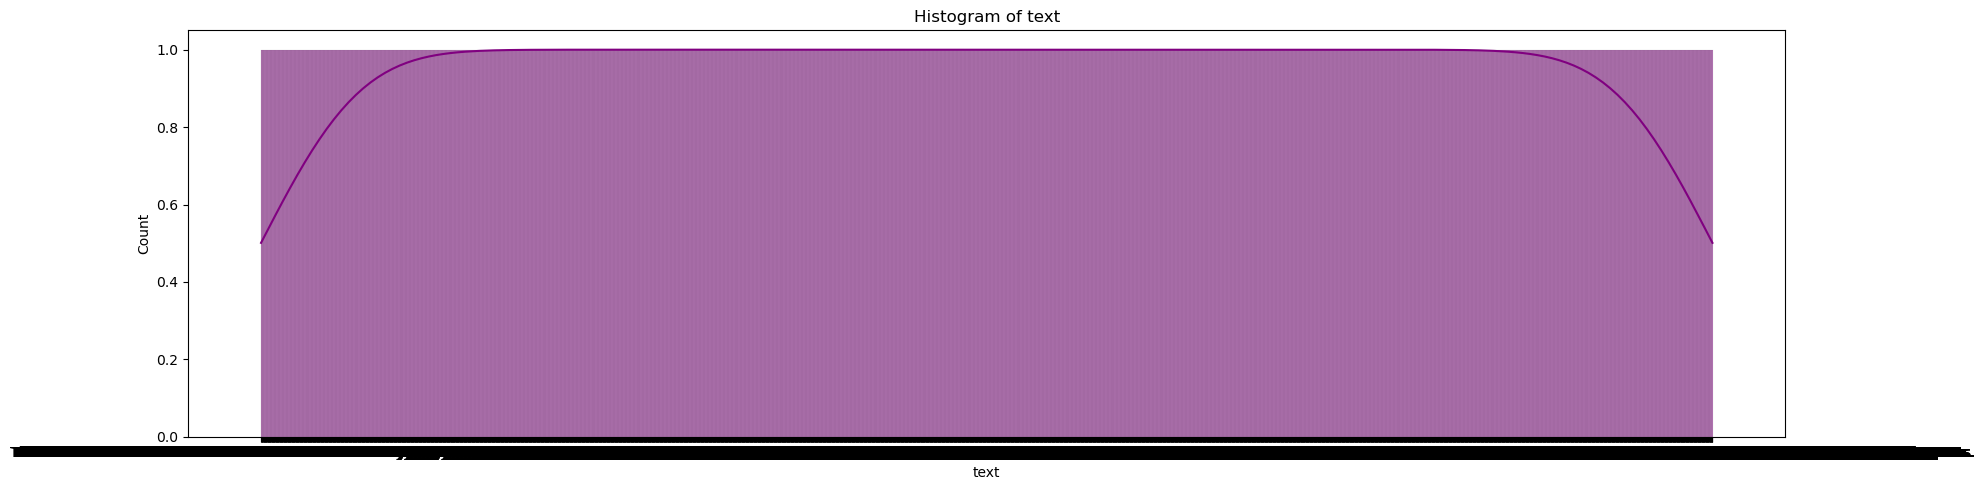

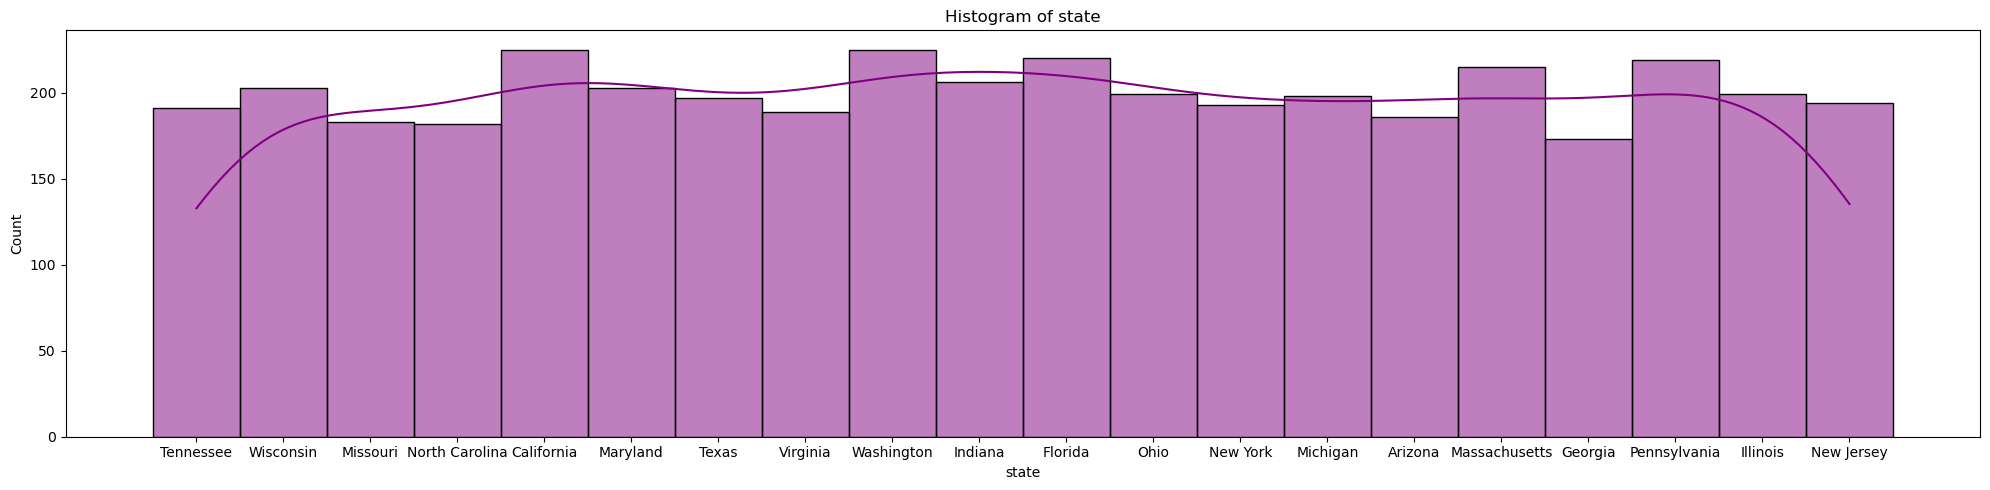

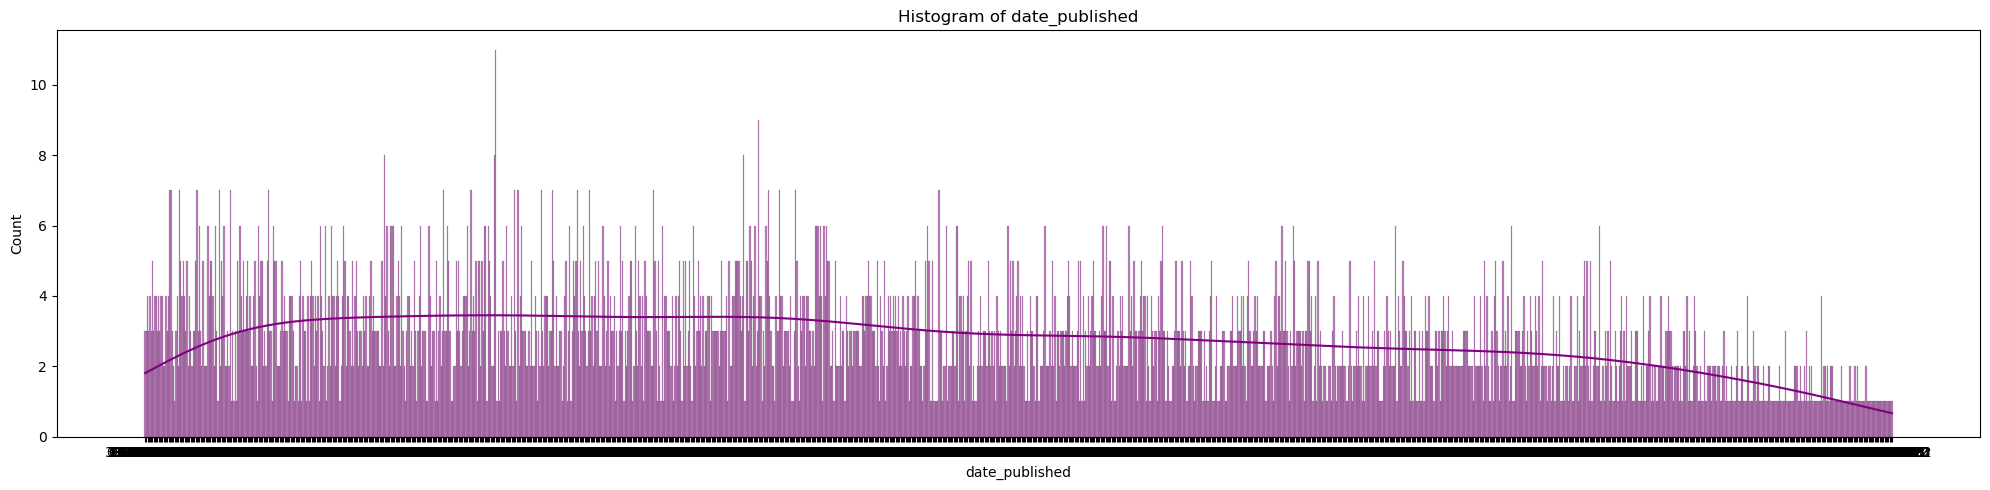

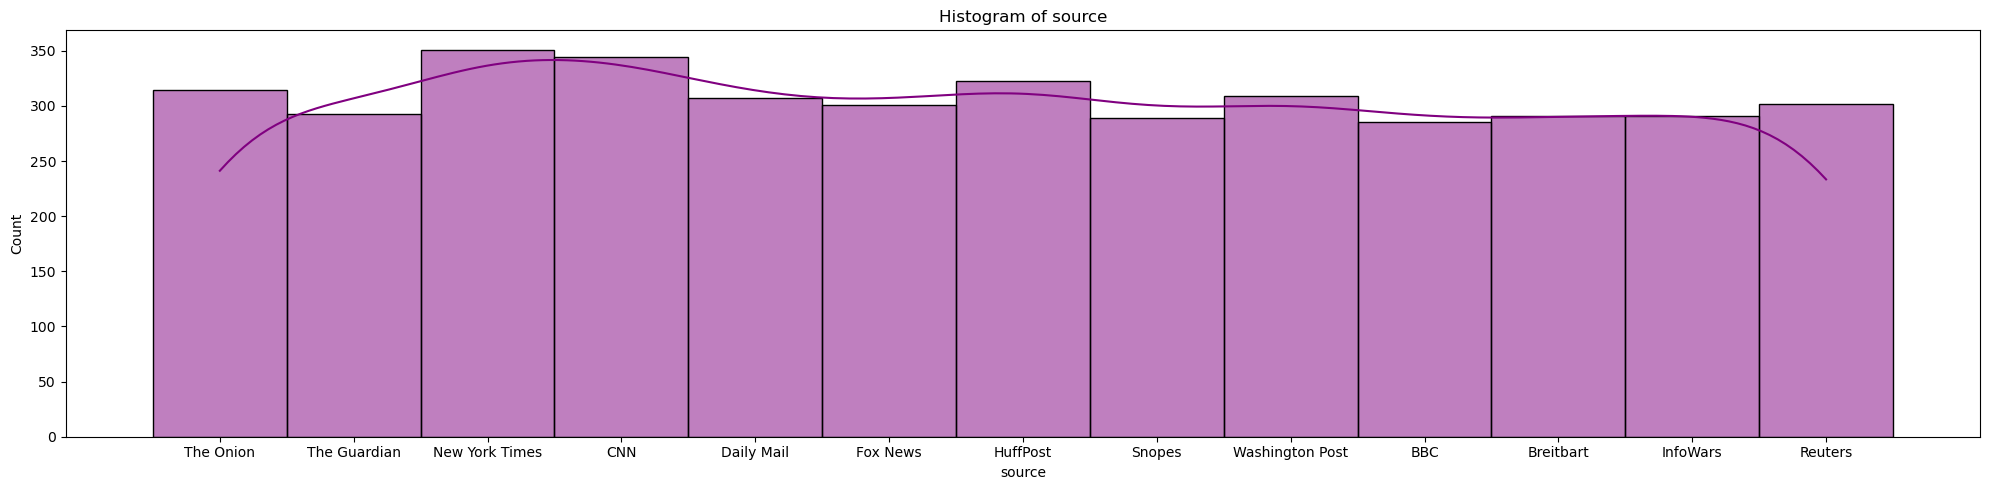

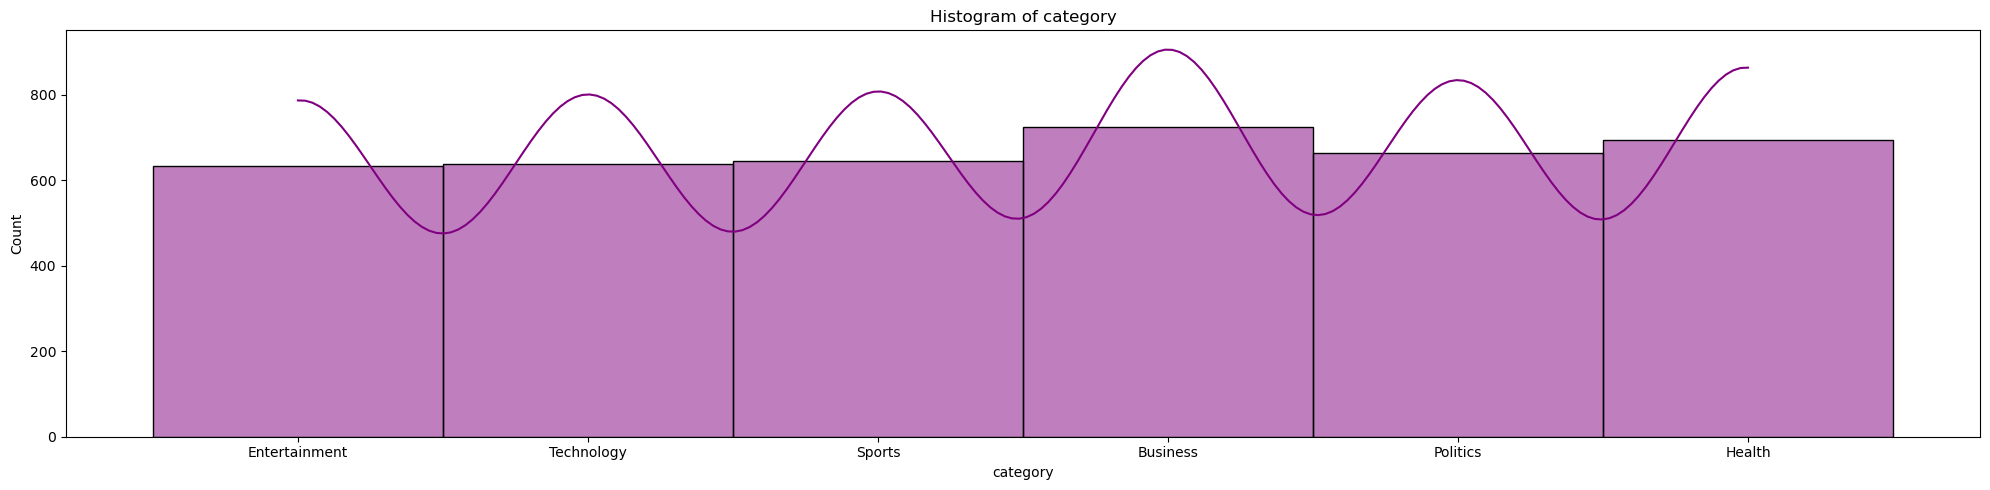

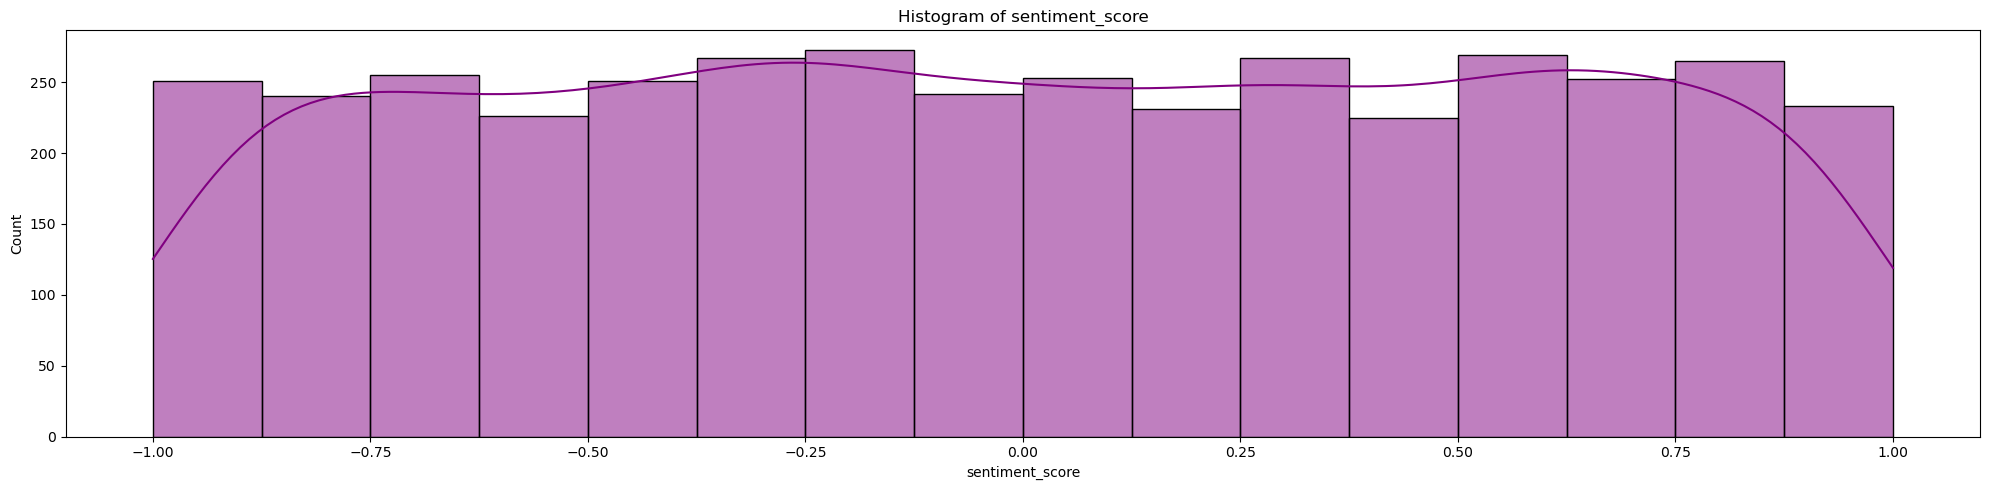

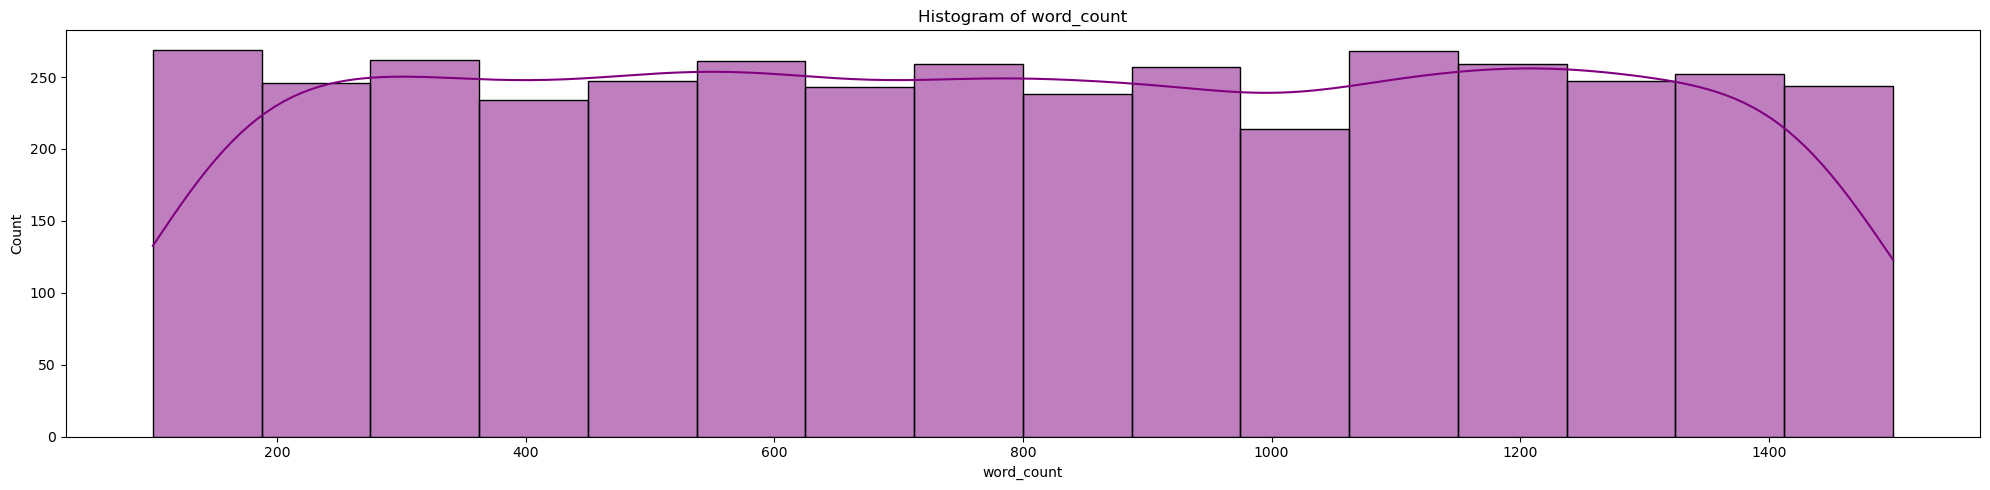

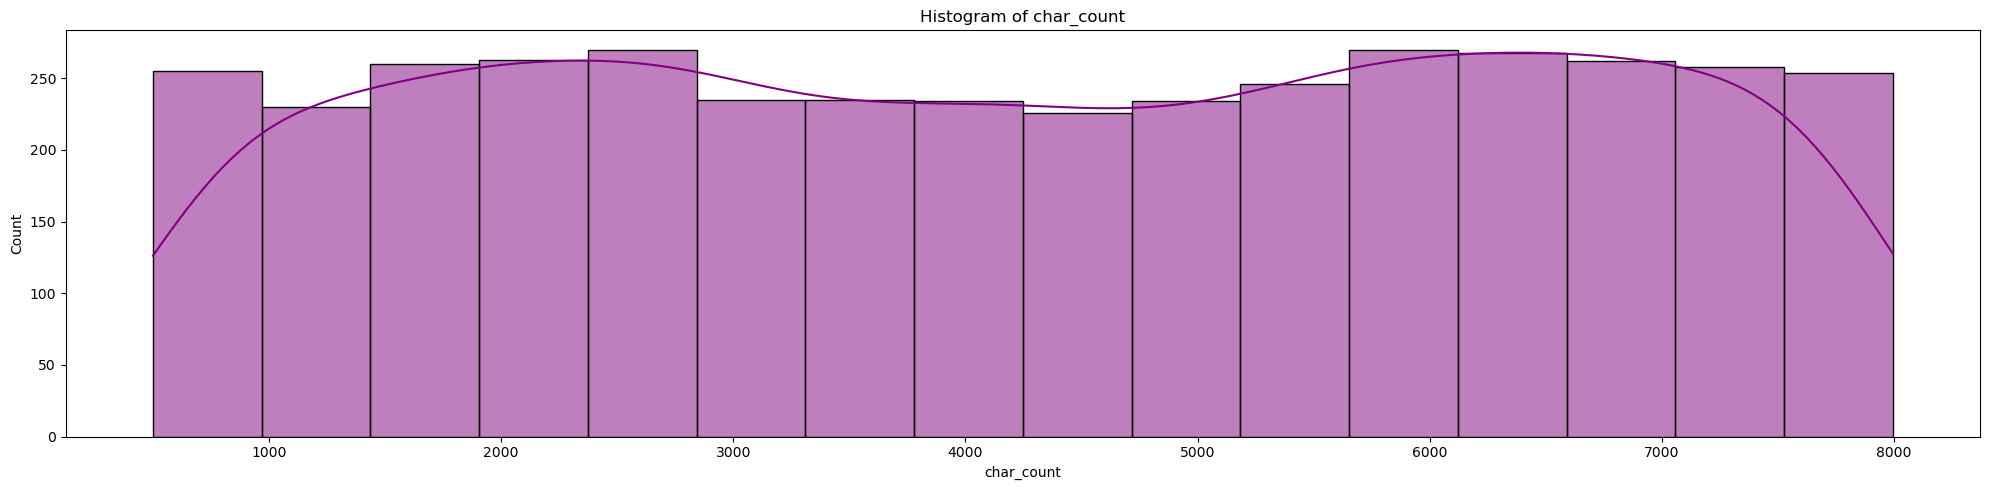

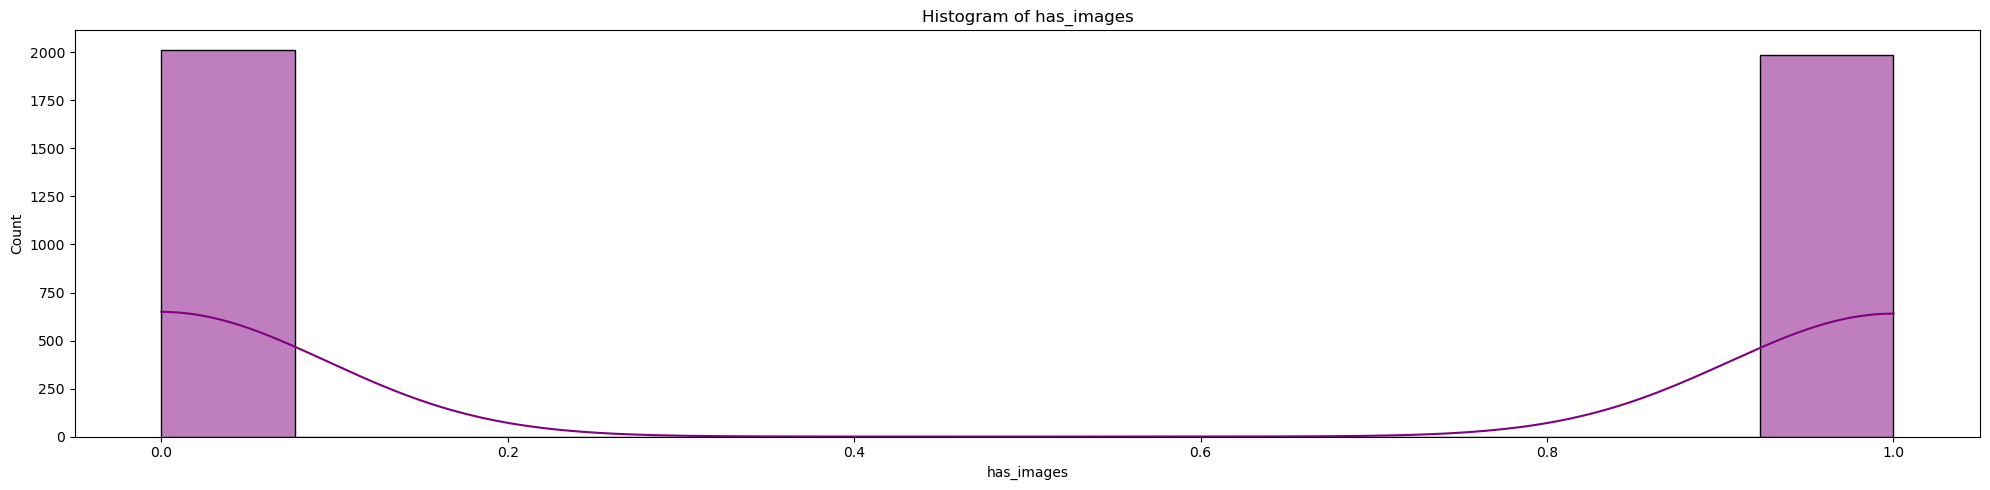

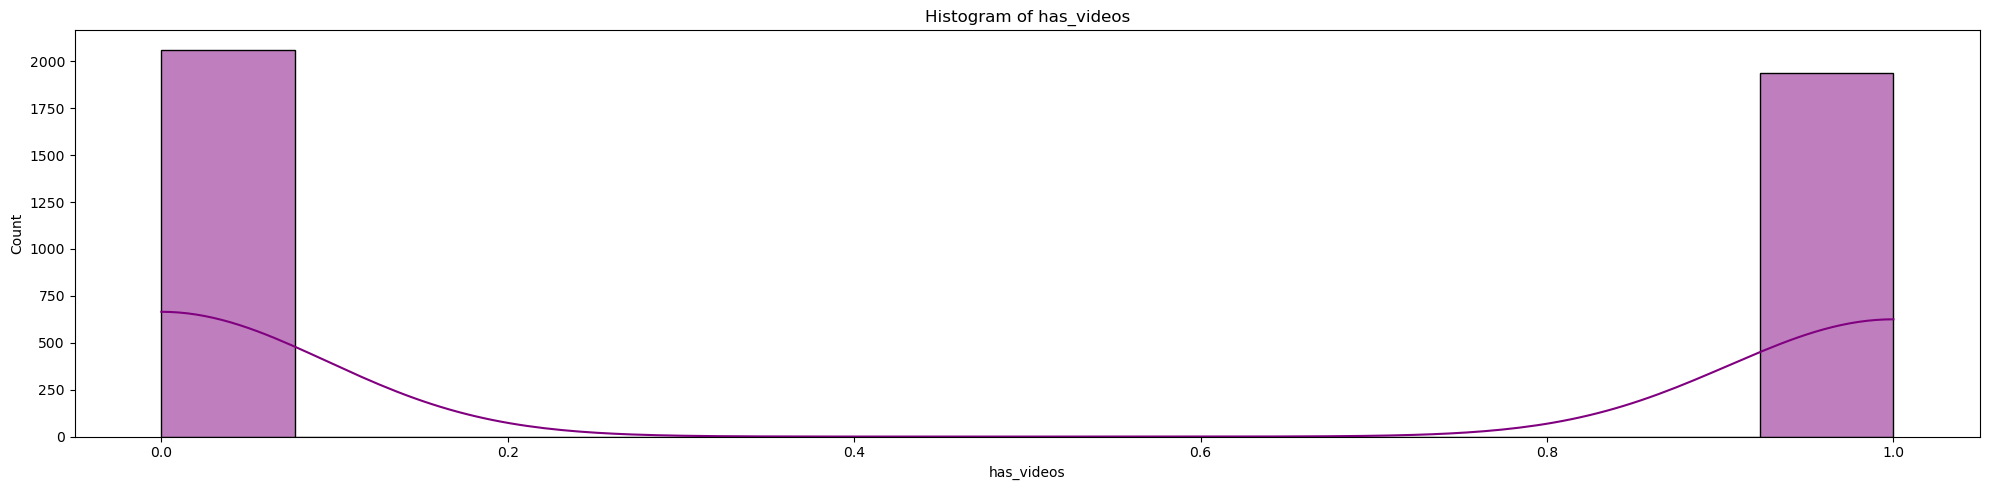

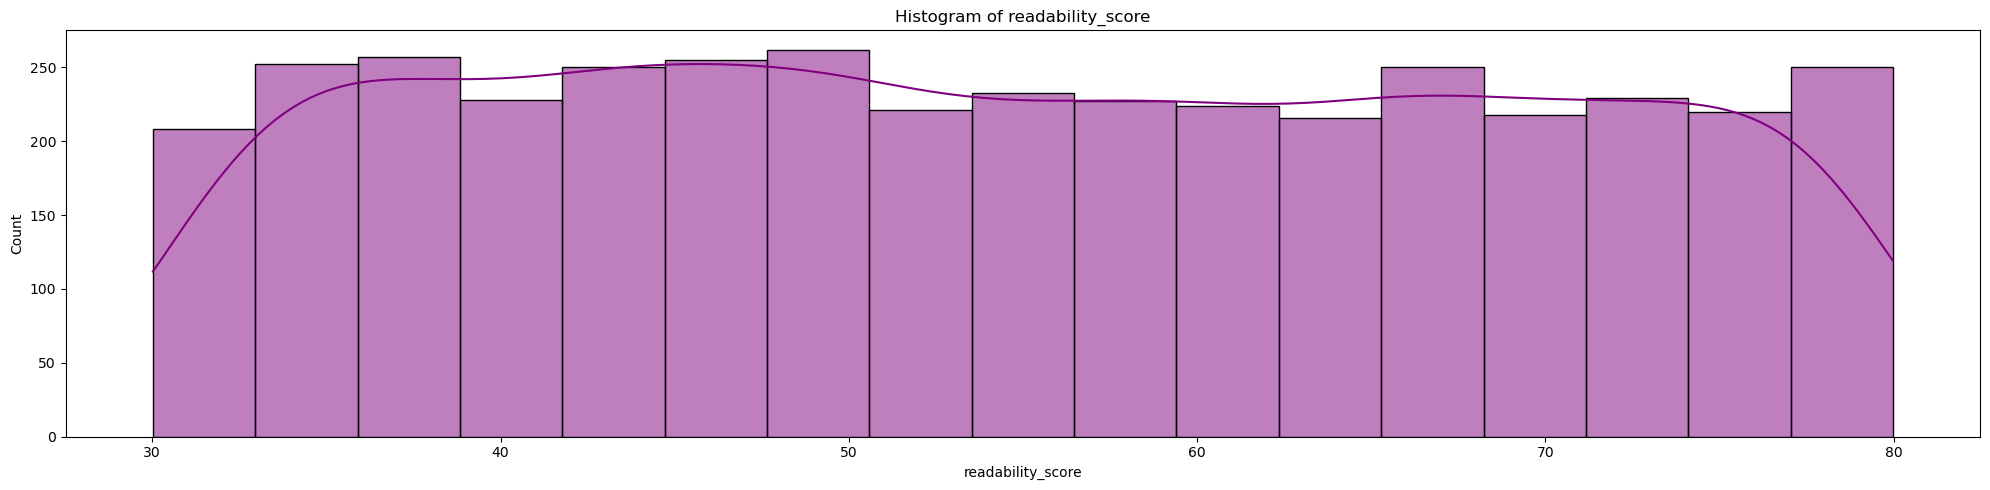

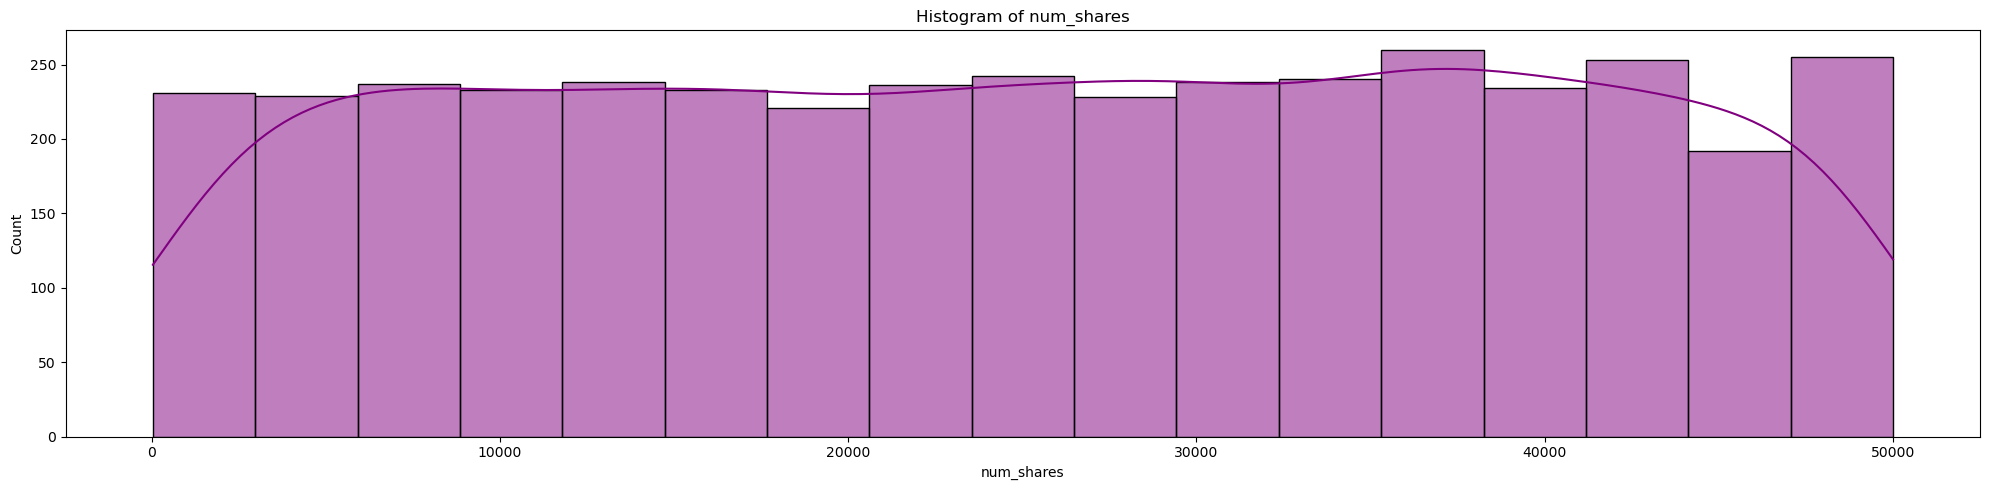

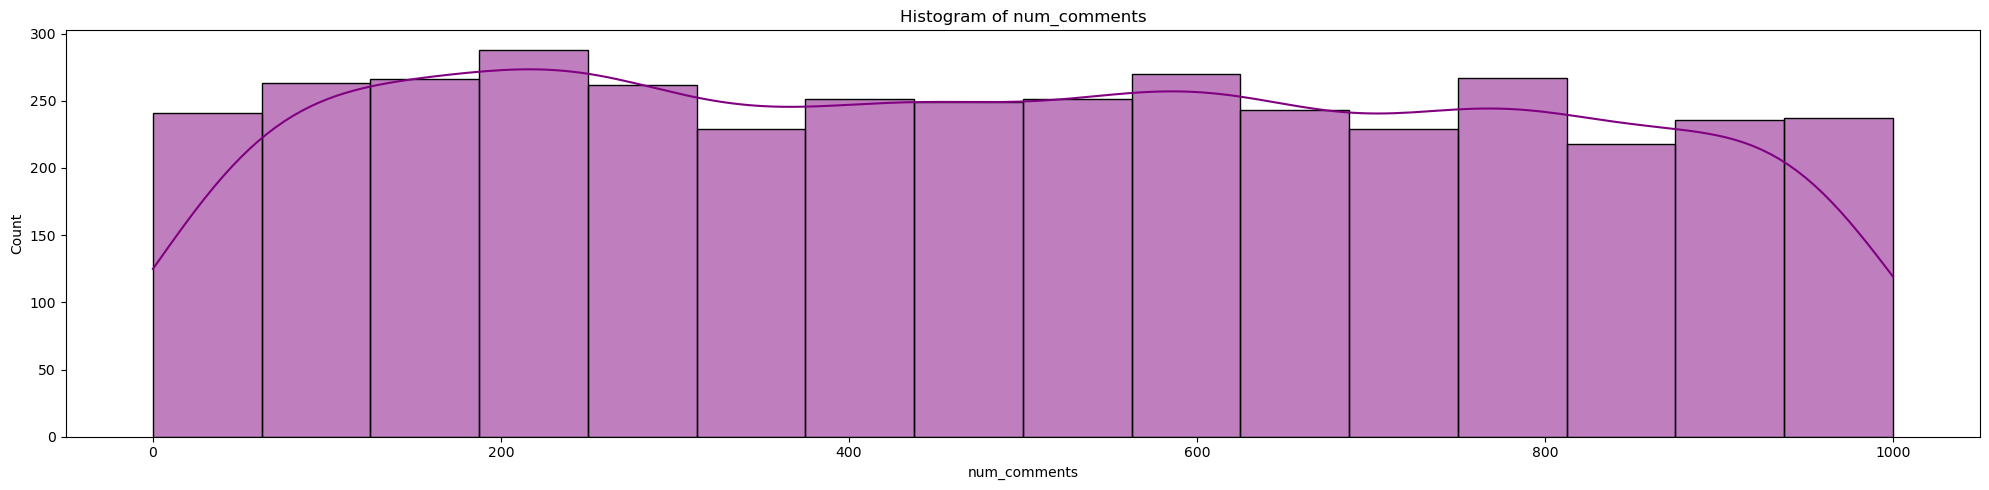

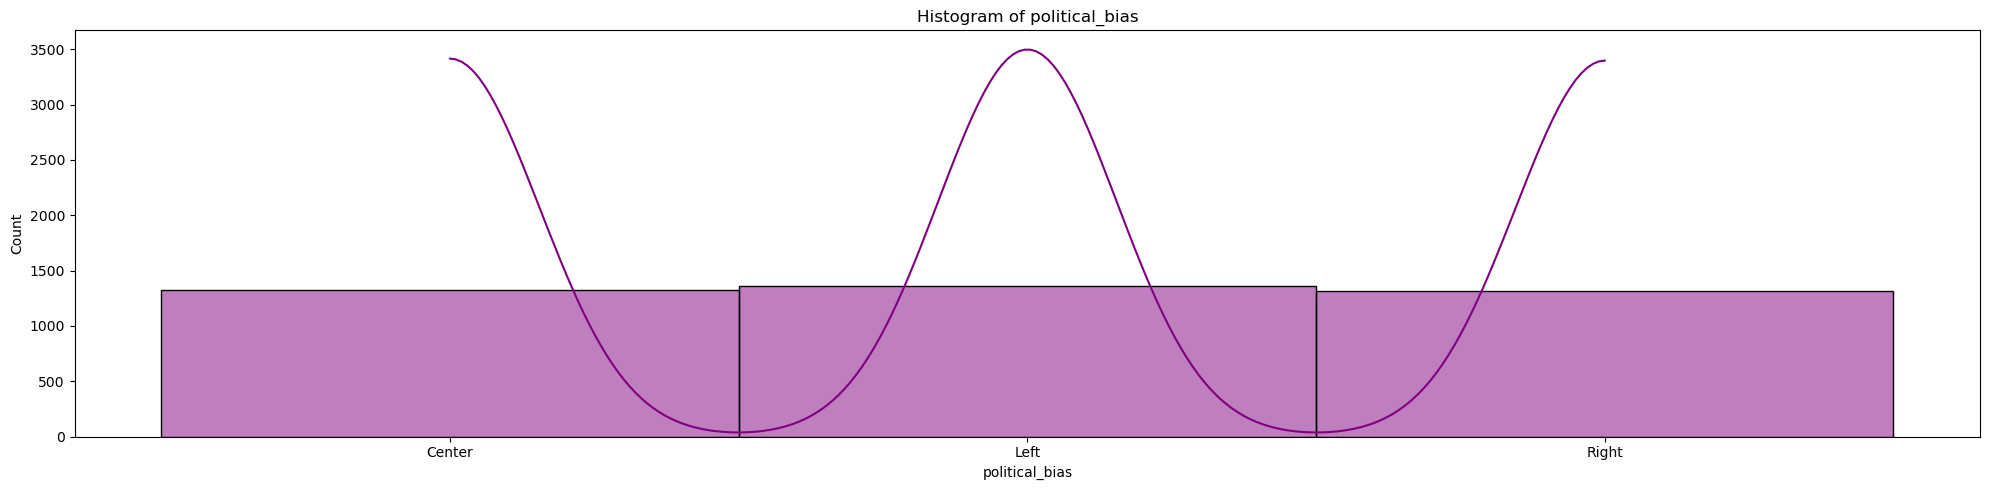

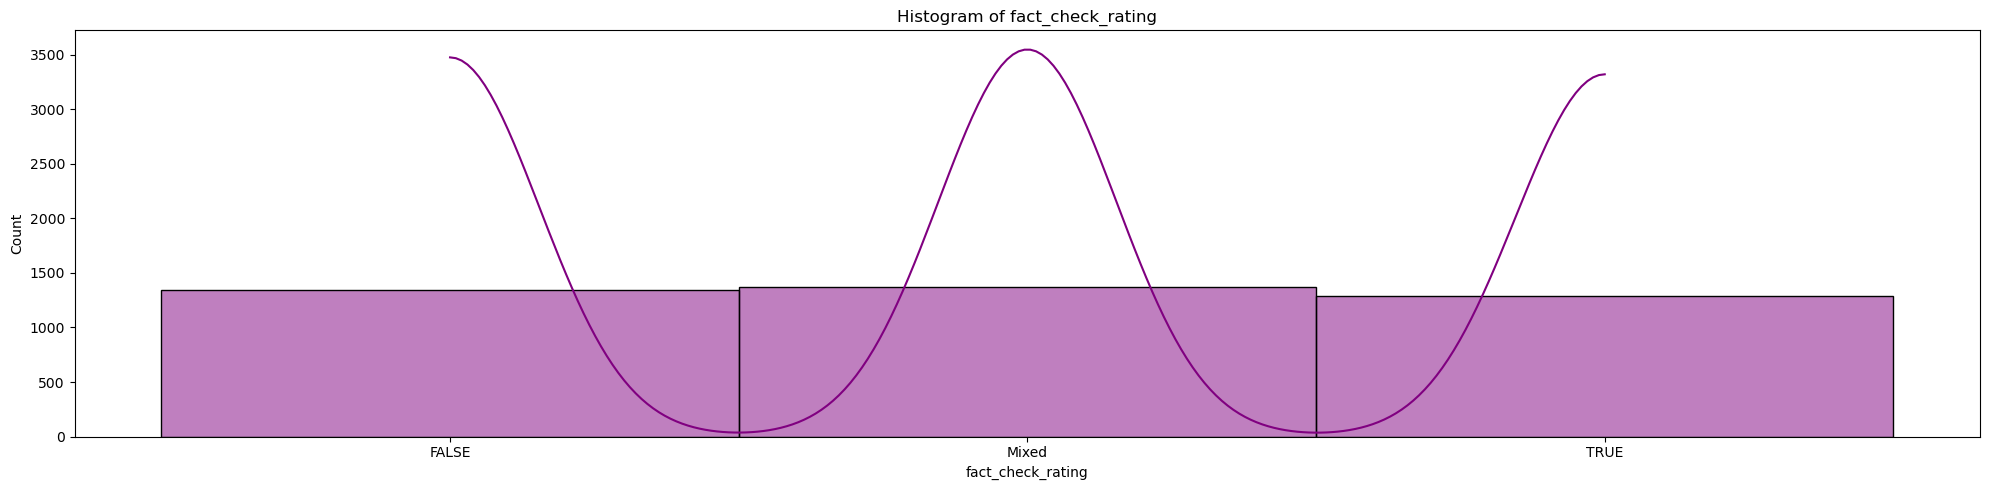

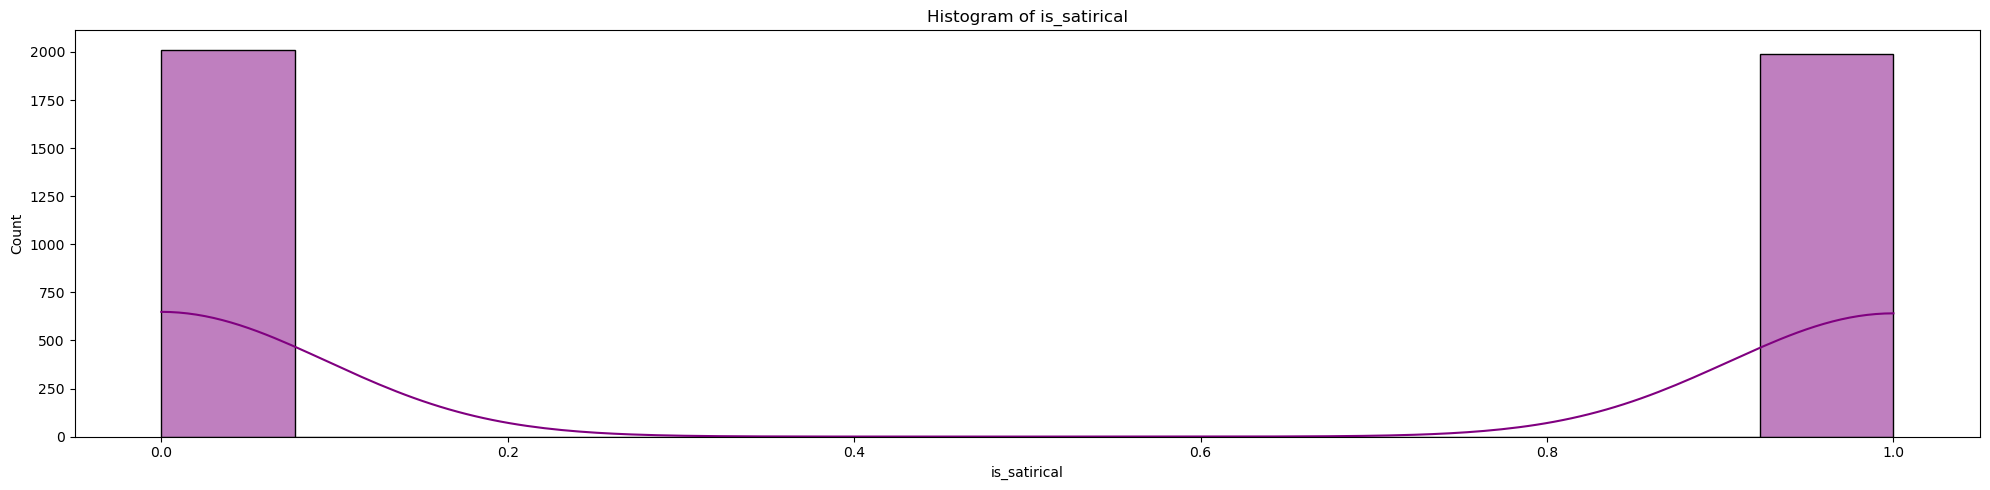

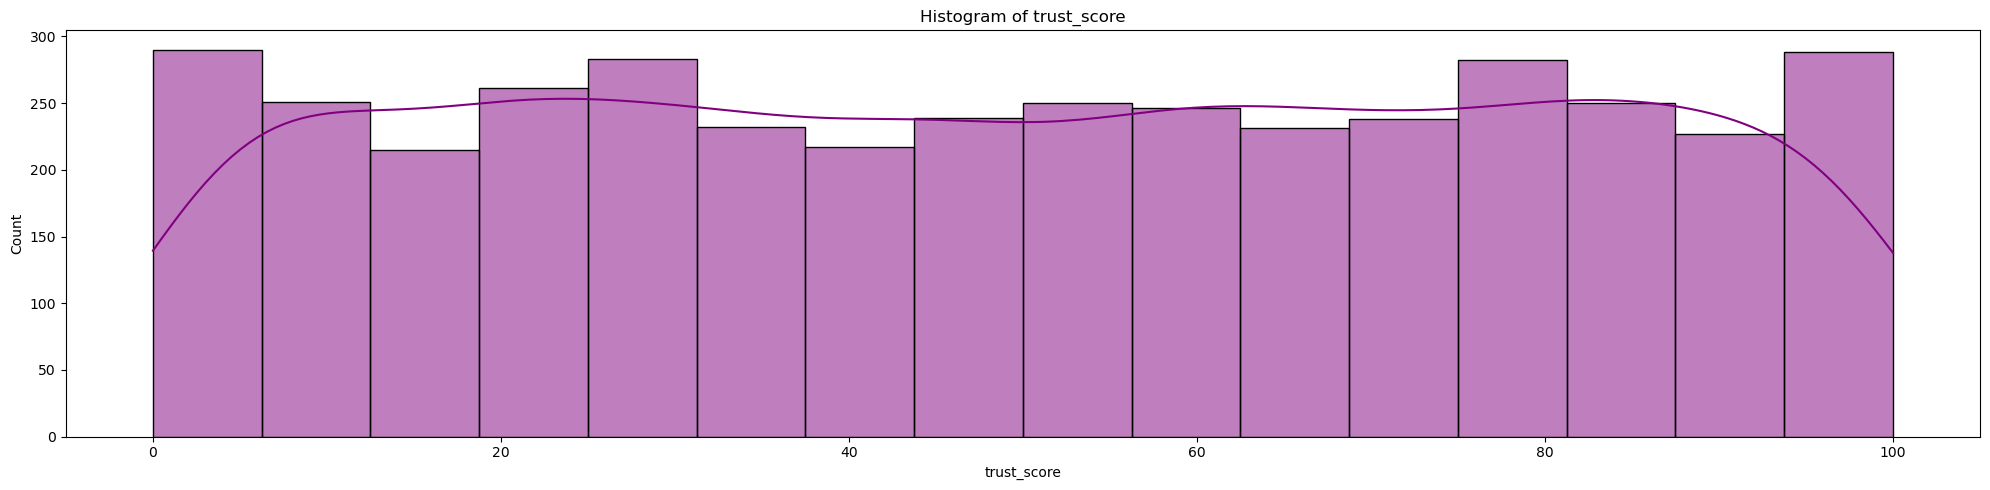

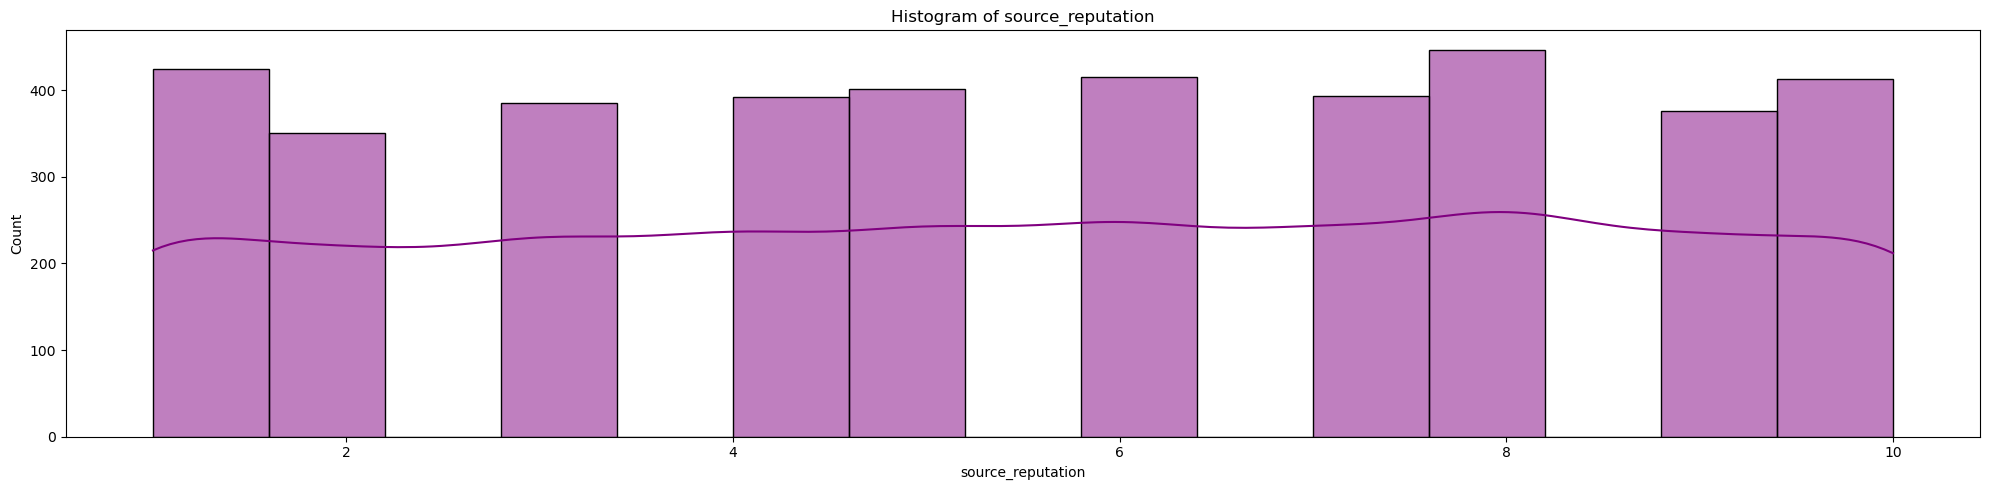

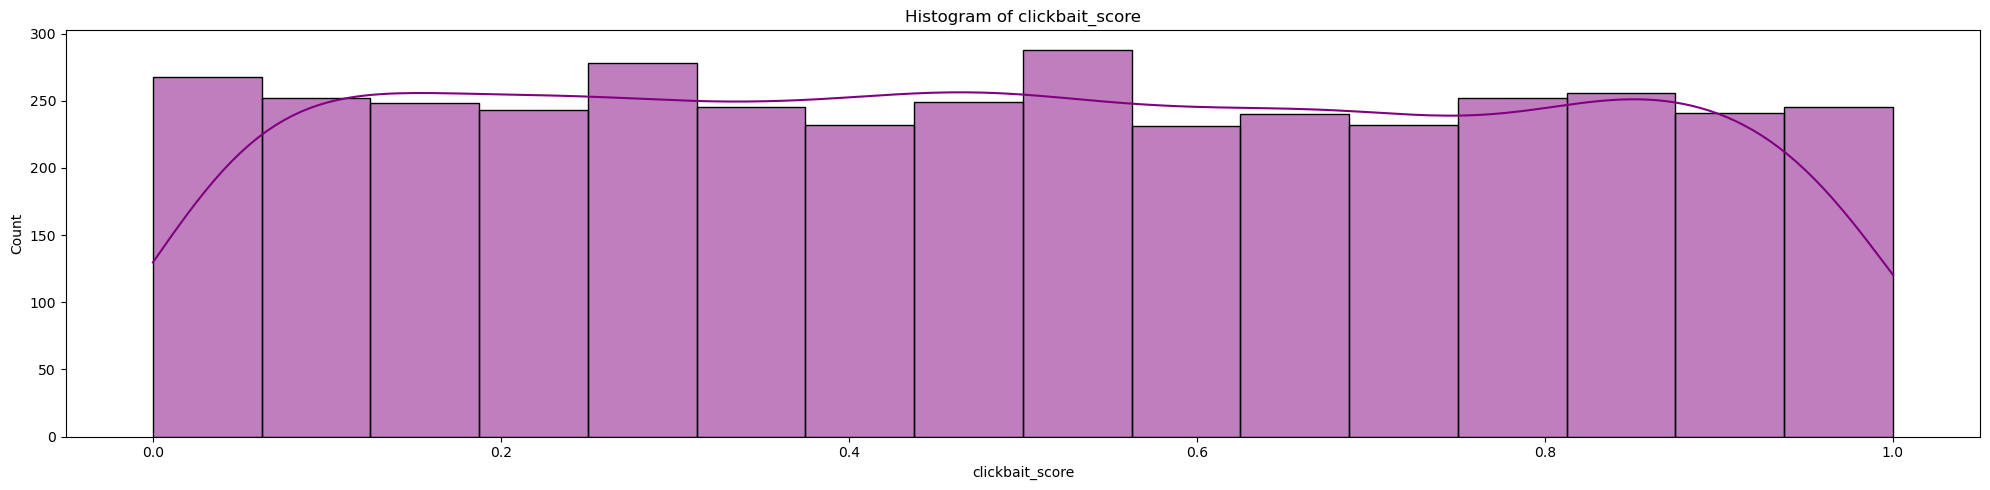

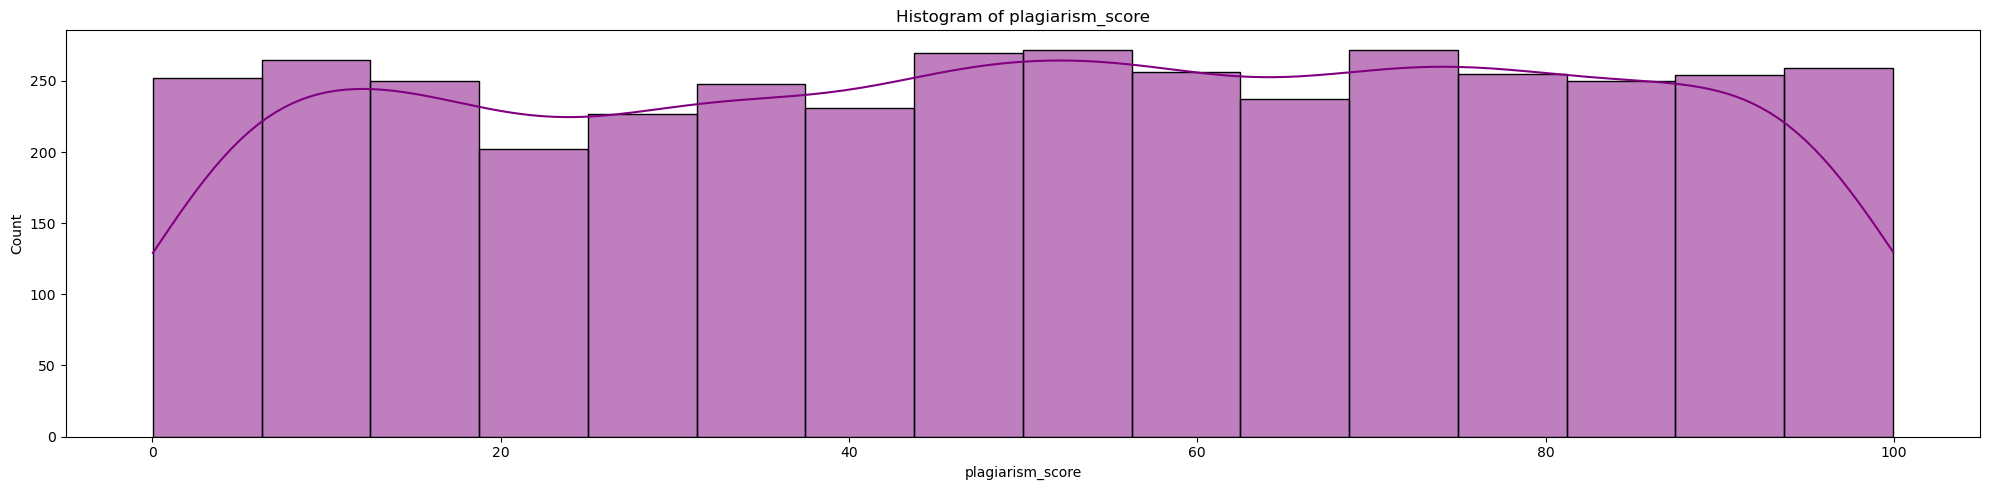

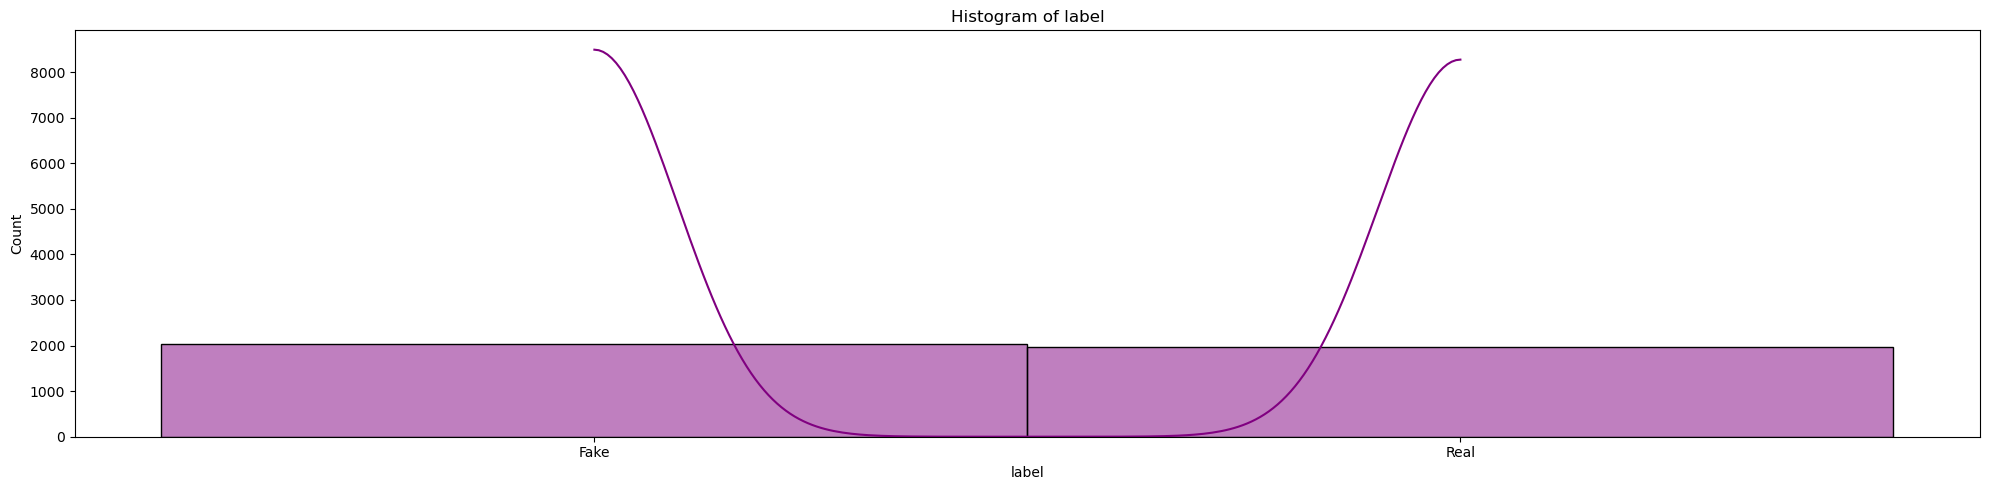

In [39]:
# Histograms
for column in df.columns:
    if column in df.columns:
        plt.figure(figsize = (20, 5))
        sns.histplot(df[column].dropna(), color = 'purple', kde = True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

In [49]:
numcols_df = df.select_dtypes(include = [np.number])
numcols_df.shape

(4000, 14)

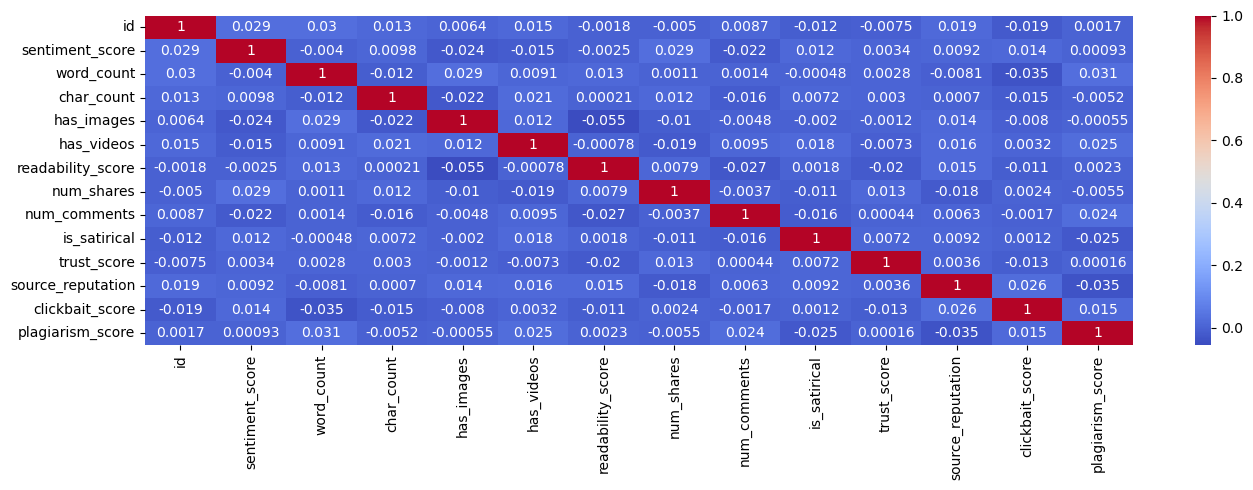

In [55]:
# heatmap
plt.figure(figsize = (14, 5))
correlation_matrix = numcols_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.tight_layout()
plt.show()

In [57]:
df['has_videos'].value_counts()

has_videos
0    2062
1    1938
Name: count, dtype: int64

In [65]:
df = df.drop(columns = ['word_count', 'char_count', 'num_shares','readability_score', 'num_comments'], axis=1)

In [67]:
df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,has_images,has_videos,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,0,0,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,1,0,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,0,1,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,1,0,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,1,0,Right,Mixed,0,95,6,0.66,77.70,Real


In [106]:
features = ['author', 'source', 'category', 'political_bias', 'fact_check_rating', 'label']

In [108]:
from sklearn.preprocessing import LabelEncoder

In [110]:
le = LabelEncoder()

In [112]:
for column in features:
    df[column] = le.fit_transform(df[column])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   author             4000 non-null   int64  
 2   source             4000 non-null   int64  
 3   category           4000 non-null   int64  
 4   sentiment_score    4000 non-null   float64
 5   has_images         4000 non-null   int64  
 6   has_videos         4000 non-null   int64  
 7   political_bias     4000 non-null   int64  
 8   fact_check_rating  4000 non-null   int64  
 9   is_satirical       4000 non-null   int64  
 10  trust_score        4000 non-null   int64  
 11  source_reputation  4000 non-null   int64  
 12  clickbait_score    4000 non-null   float64
 13  plagiarism_score   4000 non-null   float64
 14  label              4000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 468.9 KB


In [116]:
df['author'].value_counts()

author
1    819
0    809
3    806
2    783
4    783
Name: count, dtype: int64

### Model training and predictions

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [124]:
df.head()

,id,author,source,category,sentiment_score,has_images,has_videos,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,3,11,1,-0.22,0,0,0,0,1,76,6,0.84,53.35,0
1,2,2,10,5,0.92,1,0,1,1,1,1,5,0.85,28.28,0
2,3,4,7,4,0.25,0,1,0,1,0,57,1,0.72,0.38,0
3,4,0,2,4,0.94,1,0,0,2,1,18,10,0.92,32.20,0
4,5,2,3,5,-0.01,1,0,2,1,0,95,6,0.66,77.70,1


In [126]:
df = df.astype(float)

In [128]:
X = df.drop(columns = ['label'])
y = df['label']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Logistic Regression

In [132]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predictions_lr = lr.predict(X_test)

In [134]:
accuracy_lr = accuracy_score(y_test, y_predictions_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr*100}')

Logistic Regression Accuracy: 49.125


### SVM

In [144]:
sv = SVC()
sv.fit(X_train, y_train)

y_predicitons_sv = sv.predict(X_test)
print(f'SVM accuracy: {accuracy_score(y_test, y_predicitons_sv)*100}')

SVM accuracy: 49.0


### Random Forest Regressor

In [150]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_predictions_rfr = rfr.predict(X_test)

In [156]:
mse = mean_squared_error(y_test, y_predictions_rfr)
r2score = r2_score(y_test, y_predictions_rfr)
mae = mean_absolute_error(y_test, y_predictions_rfr)

print(f'mean squared error: {mse}')
print(f'r2score: {r2score}')
print(f'mean absolute error: {mae}')

mean squared error: 0.25349725
r2score: -0.01475640953471058
mean absolute error: 0.49440000000000006


### Random Forest Classifier

In [161]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_predictions_rfc = rfc.predict(X_test)

In [163]:
accuracy_rfc = accuracy_score(y_test, y_predictions_rfc)

In [165]:
print(f'accuracy score: {accuracy_rfc * 100}')

accuracy score: 49.25


### Decision Tree Classifier

In [168]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_predictions_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_predictions_dt, y_test)

print(f'accuracy score decision tree: {accuracy_dt}')

accuracy score decision tree: 0.50375


### K Neighbors Classifier

In [172]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

y_predictions_kn = kn.predict(X_test)
accuracy_kn = accuracy_score(y_predictions_dt, y_test)

print(f'accuracy score KNC: {accuracy_kn}')

accuracy score KNC: 0.50375
